<a href="https://colab.research.google.com/github/AlirezaRamezaney/Pytorch-Coding/blob/main/TorchAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip list

In [ ]:
import torch
import numpy as np


tensor_2d = torch.randn(3,4)
tensor_2d

tensor_3d = torch.zeros(2,3,4)
tensor_3d

A = np.array([1, 2, 3])
tensor_fromNUMPY = torch.tensor(A)
tensor_fromNUMPY

my_torch = torch.arange(10)
my_torch = my_torch.reshape(2,-1)
my_torch[:,3]

B = torch.tensor([3, 4, 5, 6])
C = torch.tensor([7, 8, 9, 10])

D = B + C
B = B.add(C)
print("{0}  \n  {1}".format(D,B))


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
# create the model which inherit from nn.module
# fully-connected model with 2 hidden layers, 4 input features, 3 outputs label
# nn.Linear(n,m) is a linear function class with random weights and n-dim input and m-dim output
class Model(nn.Module):
  def __init__(self, In=4, h1=8, h2=9, out=3):
    super().__init__()
    self.fc1 = nn.Linear(In, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.fc3 = nn.Linear(h2, out)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    return x

In [4]:
#make an instance of model class
torch.manual_seed(50)
model = Model()
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (fc3): Linear(in_features=9, out_features=3, bias=True)
)>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# upload data using Pandas Dataframe
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)
my_df.loc[my_df['species']=='setosa', 'species']=0.0
my_df.loc[my_df['species']=='versicolor', 'species']=1.0
my_df.loc[my_df['species']=='virginica', 'species']=2.0
my_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [7]:
# construct input and output
x = my_df.drop(columns=['species'], axis=1)
y = my_df['species']
x = x.values
y = y.values
y = y.astype(int)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
#Construct train and test data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.named_parameters(), lr=0.01)
model.named_parameters

<bound method Module.named_parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (fc3): Linear(in_features=9, out_features=3, bias=True)
)>

In [10]:
# train the model
epochs = 200
losses = []

for i in range(epochs):
  y_pred = model.forward(x_train)
  loss = criterion(y_pred, y_train)

  losses.append(loss.detach().numpy())
  if i%10 ==0:
    print('epoch {} and loss is {}'.format(i, loss))


  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch 0 and loss is 1.1123688220977783
epoch 10 and loss is 0.9259873628616333
epoch 20 and loss is 0.7479482293128967
epoch 30 and loss is 0.6352894306182861
epoch 40 and loss is 0.5455486178398132
epoch 50 and loss is 0.4754999577999115
epoch 60 and loss is 0.43424877524375916
epoch 70 and loss is 0.41426125168800354
epoch 80 and loss is 0.4061287045478821
epoch 90 and loss is 0.40268704295158386
epoch 100 and loss is 0.4001369774341583
epoch 110 and loss is 0.39824673533439636
epoch 120 and loss is 0.3964466452598572
epoch 130 and loss is 0.39530307054519653
epoch 140 and loss is 0.3940476179122925
epoch 150 and loss is 0.39303699135780334
epoch 160 and loss is 0.39234501123428345
epoch 170 and loss is 0.3911594748497009
epoch 180 and loss is 0.39027369022369385
epoch 190 and loss is 0.38942211866378784


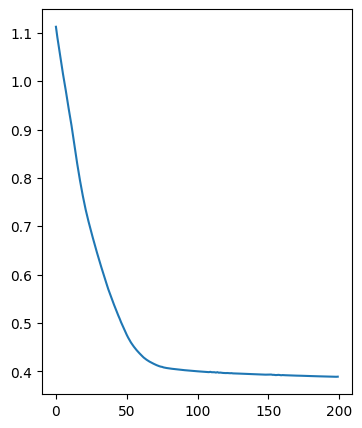

In [11]:
# some visualization
plt.figure(figsize=(4,5))
plt.plot(range(epochs), losses)